In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import calendar 
import warnings
warnings.filterwarnings('ignore')
print("Setup Complete")

Setup Complete


In [12]:
# Reading Data
flights = pd.read_csv('flights.csv')
flights.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis 

### Prepping and Cleaning Data

In [13]:
pd.isna(flights)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
5819075,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
5819076,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
5819077,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True


In [14]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [15]:
flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

There are a lot of Missing values, we are goin to assing zero to populate the data, we are goin to assume that those missing values are on time flights.

In [17]:
# Replace NaN values with zeros
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [46]:
# First create a copy of the dataset
flights_copy = flights
flights_copy.fillna(0, inplace= True)

In [43]:
flights_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 33 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [44]:
flights_copy.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
5819074    False
5819075    False
5819076    False
5819077    False
5819078    False
Length: 5819079, dtype: bool

In [45]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


# Analizing Flight Volume by Month and Day

In [56]:
# Converting Months and Days rom numbers to names


month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 
    9: 'September', 10: 'Ocotber', 11: ' November', 12: 'December'
}

day_mapping = {
    1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: ' Sunday'
}

# Use the map function to create  two new columns with month  and day names

flights_copy['MONTH_NAME'] = flights_copy['MONTH'].map(month_mapping)
flights_copy['DAY_NAME'] = flights_copy['DAY_OF_WEEK'].map(day_mapping)

flights_copy

,YEAR,MONTH,MONTH_NAME,DAY,DAY_OF_WEEK,DAY_NAME,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,January,1,4,Thursday,AS,98,N407AS,ANC,...,408.0,-22.0,0,0,0,0,0,0,0,0
1,2015,1,January,1,4,Thursday,AA,2336,N3KUAA,LAX,...,741.0,-9.0,0,0,0,0,0,0,0,0
2,2015,1,January,1,4,Thursday,US,840,N171US,SFO,...,811.0,5.0,0,0,0,0,0,0,0,0
3,2015,1,January,1,4,Thursday,AA,258,N3HYAA,LAX,...,756.0,-9.0,0,0,0,0,0,0,0,0
4,2015,1,January,1,4,Thursday,AS,135,N527AS,SEA,...,259.0,-21.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,December,31,4,Thursday,B6,688,N657JB,LAX,...,753.0,-26.0,0,0,0,0,0,0,0,0
5819075,2015,12,December,31,4,Thursday,B6,745,N828JB,JFK,...,430.0,-16.0,0,0,0,0,0,0,0,0
5819076,2015,12,December,31,4,Thursday,B6,1503,N913JB,JFK,...,432.0,-8.0,0,0,0,0,0,0,0,0
5819077,2015,12,December,31,4,Thursday,B6,333,N527JB,MCO,...,330.0,-10.0,0,0,0,0,0,0,0,0


In [58]:
# For aesthetics purposes, I will change the last columns from float to int

col = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

flights_copy[col]= flights_copy[col].applymap(np.int64)

In [59]:
flights_copy.tail()

,YEAR,MONTH,MONTH_NAME,DAY,DAY_OF_WEEK,DAY_NAME,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,December,31,4,Thursday,B6,688,N657JB,LAX,...,753.0,-26.0,0,0,0,0,0,0,0,0
5819075,2015,12,December,31,4,Thursday,B6,745,N828JB,JFK,...,430.0,-16.0,0,0,0,0,0,0,0,0
5819076,2015,12,December,31,4,Thursday,B6,1503,N913JB,JFK,...,432.0,-8.0,0,0,0,0,0,0,0,0
5819077,2015,12,December,31,4,Thursday,B6,333,N527JB,MCO,...,330.0,-10.0,0,0,0,0,0,0,0,0
5819078,2015,12,December,31,4,Thursday,B6,839,N534JB,JFK,...,442.0,2.0,0,0,0,0,0,0,0,0


## Flight Volume by Month

In [61]:
# Group the data by Month

flight_vol_by_month = flights_copy.groupby('MONTH_NAME')['FLIGHT_NUMBER'].count()
flight_vol_by_month

MONTH_NAME
 November    467972
April        485151
August       510536
December     479230
February     429191
January      469968
July         520718
June         503897
March        504312
May          496993
Ocotber      486165
September    464946
Name: FLIGHT_NUMBER, dtype: int64

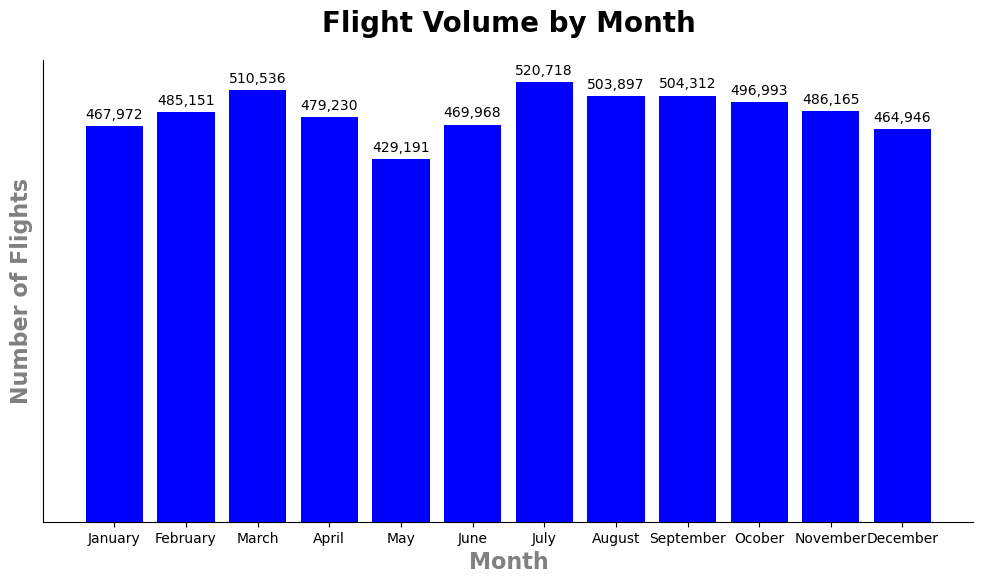

In [37]:
# Let's plot the result

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
         'Ocober', 'November', 'December']

sorted_months = sorted(months, key = lambda m: months.index(m) + 1)

plt.figure(figsize = (12,6))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
bars = plt.bar(sorted_months, flight_vol_by_month, color = 'blue')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{height:,.0f}", xy = (bar.get_x() + bar.get_width()/ 2, height),
                xytext = (0, 3), textcoords = 'offset points', ha = 'center',va = 'bottom')
plt.title("Flight Volume by Month", pad = 20, fontweight = 'bold',  fontsize = 20)
plt.xlabel("Month", fontdict = { 'fontsize': '16', 'fontweight': 'bold'}, color = 'grey')
plt.ylabel("Number of Flights",fontdict = { 'fontsize': '16', 'fontweight': 'bold'}, color = 'grey')
plt.yticks([])
plt.savefig('flight_volume_by_month.png', bbox_inches = 'tight', transparent = True)
plt.show()

## Flight Volume by Day

In [77]:
# Group the data by Day

flight_vol_by_day = flights_copy.groupby('DAY_NAME')['FLIGHT_NUMBER'].count()
flight_vol_by_day

DAY_NAME
 Sunday      817764
Friday       862209
Monday       865543
Saturday     700545
Thursday     872521
Tuesday      844600
Wednesday    855897
Name: FLIGHT_NUMBER, dtype: int64

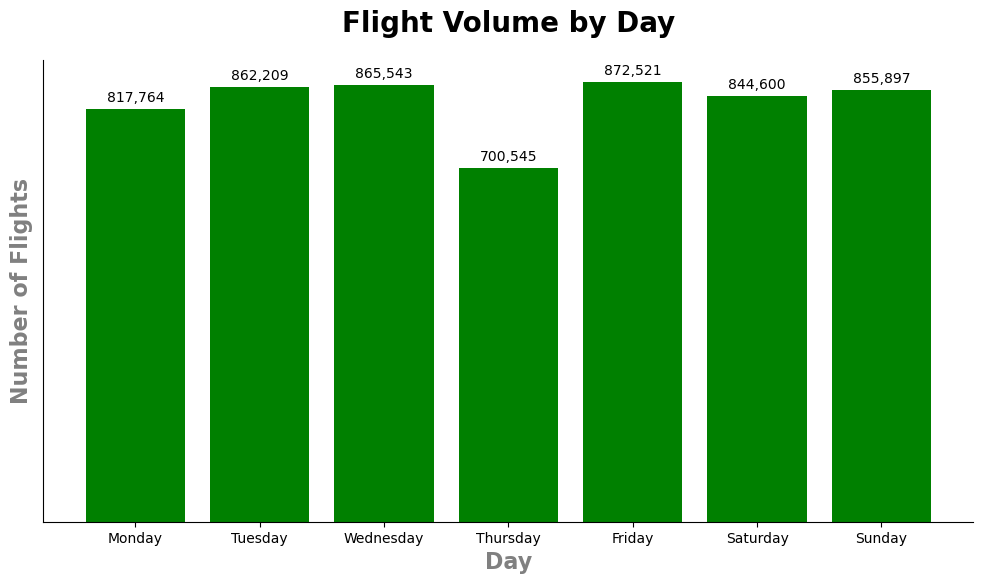

In [38]:
# Let's plot results

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sorted_days = sorted(days, key = lambda d: days.index(d) + 1)

plt.figure(figsize = (12, 6))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
bars = plt.bar(sorted_days, flight_vol_by_day, color = 'green')
plt.title("Flight Volume by Day", fontdict = {'fontsize': '20', 'fontweight': 'bold'}, pad = 20)
plt.xlabel("Day", fontdict = {'fontsize': ' 16', 'fontweight': 'bold'}, color = 'grey')
plt.ylabel("Number of Flights", fontdict = {'fontsize': ' 16', 'fontweight': 'bold'}, color = 'grey')
plt.yticks([])

for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{height:,.0f}", xy = (bar.get_x() + bar.get_width()/ 2, height),
                xytext = (0, 3), textcoords = 'offset points', ha = 'center',va = 'bottom')
plt.savefig('flight_volume_by_day.png', bbox = 'tight', transparent = True)
plt.show()

# Percentage of Delays

In [79]:
#Checking how many unique values are in the column YEAR

flights_copy['YEAR'].unique()

array([2015])

In [107]:
flights_copy.columns

Index(['YEAR', 'MONTH', 'MONTH_NAME', 'DAY', 'DAY_OF_WEEK', 'DAY_NAME',
       'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'DELAY_CLASS', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'],
      dtype='object')

In [108]:
# Let's reorder the columns for easy access

new_col_order = ['YEAR', 'MONTH', 'MONTH_NAME', 'DAY', 'DAY_OF_WEEK', 'DAY_NAME',
       'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY']
flights_copy = flights_copy[new_col_order]
flights_copy.head()

,YEAR,MONTH,MONTH_NAME,DAY,DAY_OF_WEEK,DAY_NAME,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,January,1,4,Thursday,AS,98,N407AS,ANC,...,408.0,-22.0,0,0,0,0,0,0,0,0
1,2015,1,January,1,4,Thursday,AA,2336,N3KUAA,LAX,...,741.0,-9.0,0,0,0,0,0,0,0,0
2,2015,1,January,1,4,Thursday,US,840,N171US,SFO,...,811.0,5.0,0,0,0,0,0,0,0,0
3,2015,1,January,1,4,Thursday,AA,258,N3HYAA,LAX,...,756.0,-9.0,0,0,0,0,0,0,0,0
4,2015,1,January,1,4,Thursday,AS,135,N527AS,SEA,...,259.0,-21.0,0,0,0,0,0,0,0,0


In [109]:
flights_copy.columns.unique

<bound method Index.unique of Index(['YEAR', 'MONTH', 'MONTH_NAME', 'DAY', 'DAY_OF_WEEK', 'DAY_NAME',
       'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'],
      dtype='object')>

In [114]:
total_flights = len(flights_copy)
delayed_flights = len(flights_copy[flights_copy['DEPARTURE_DELAY']> 0])
percentage_delayed_flights = (delayed_flights / total_flights) * 100

# Average delayed time

avg_delay_time = flights_copy[flights_copy['DEPARTURE_DELAY']> 0]['DEPARTURE_DELAY'].mean()

print(f"Percentage of Delayed flights in 2015:  {percentage_delayed_flights:.2f}%")
print(f"Average Delay Time in 2015: {avg_delay_time:.2f} minutes")

Percentage of Delayed flights in 2015:  36.53%
Average Delay Time in 2015: 32.67 minutes


## Percentage of Delayed through the Year

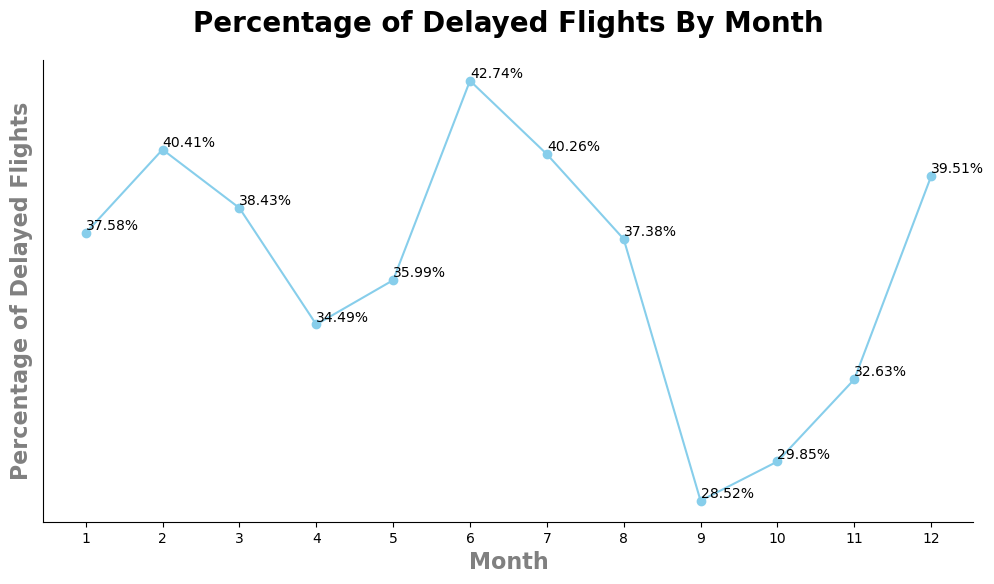

In [41]:
# Group delayed flights by month and caculate the perecentage

delayed_flights_by_month = flights_copy[flights_copy['DEPARTURE_DELAY']> 0]
percentage_delayed_by_month = delayed_flights_by_month.groupby('MONTH').size() / flights_copy.groupby('MONTH').size()* 100

# Plot the results

plt.figure(figsize = (12, 6))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(percentage_delayed_by_month.index, percentage_delayed_by_month, marker = 'o',
        color = 'skyblue', linestyle = '-')
plt.title("Percentage of Delayed Flights By Month", pad = 20, fontdict = {'fontsize': '20', 'fontweight': 'bold'})
plt.xlabel("Month", color = 'grey', fontdict = {'fontsize': '16', 'fontweight': 'bold'})
plt.ylabel("Percentage of Delayed Flights", color = 'grey', fontdict = {'fontsize': '16', 'fontweight': 'bold'})
plt.xticks(percentage_delayed_by_month.index)
plt.grid(False)
plt.yticks([])

for month, percentage in zip(percentage_delayed_by_month.index, percentage_delayed_by_month):
    plt.text(month, percentage, f"{percentage:.2f}%", ha = 'left', va = 'bottom')
plt.savefig('perce-delay_flights_bymonth.png', bbox = 'tight', transparent = True)
plt.show()



## Percentage Delayed Flights from Boston

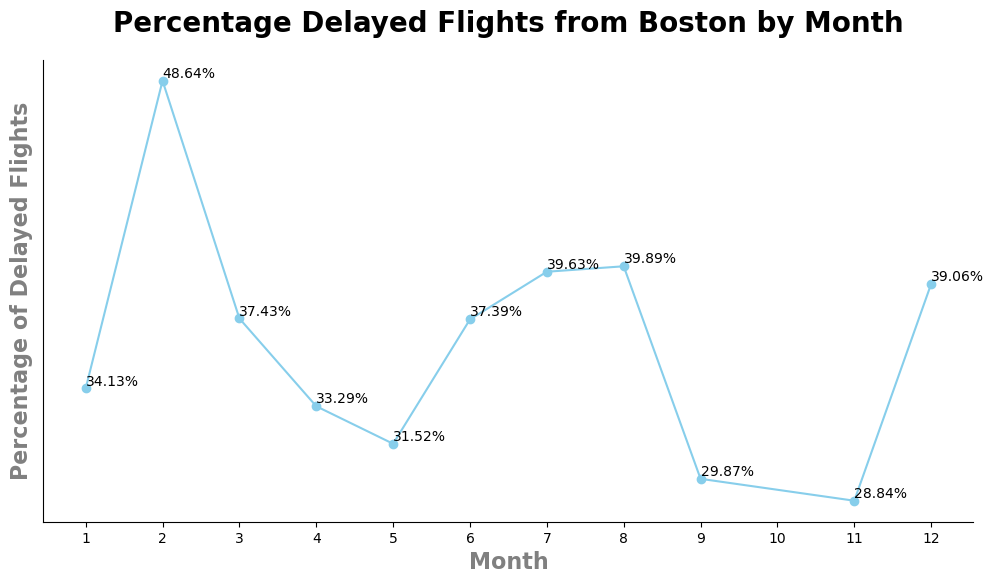

In [42]:
# Number of Flights departure from Boston

boston_departures = flights_copy[flights_copy['ORIGIN_AIRPORT'] == 'BOS']

# Percentage of delayed flights

delayed_flights_from_boston = boston_departures[boston_departures['DEPARTURE_DELAY']> 0]
percentage_delayed_from_bos = delayed_flights_from_boston.groupby('MONTH').size()/ boston_departures.groupby('MONTH').size() * 100

# Plot the results

plt.figure(figsize = (12, 6))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(percentage_delayed_from_bos.index, percentage_delayed_from_bos, marker = 'o',
        color = 'skyblue', linestyle = '-')
plt.title("Percentage Delayed Flights from Boston by Month", pad = 20, fontdict = {'fontsize': '20', 'fontweight': 'bold'})
plt.xlabel("Month", color = 'grey', fontdict = {'fontsize': '16', 'fontweight': 'bold'})
plt.ylabel("Percentage of Delayed Flights", color = 'grey', fontdict = {'fontsize': '16', 'fontweight': 'bold'})
plt.xticks(percentage_delayed_by_month.index)
plt.grid(False)
plt.yticks([])

for month, percentage in zip(percentage_delayed_from_bos.index, percentage_delayed_from_bos):
    plt.text(month, percentage, f"{percentage:.2f}%", ha = 'left', va = 'bottom')
plt.savefig('perce_delay_flights_from_boston.png', bbox = 'tight')
plt.show()

# Canceled Flight in 2015 

In [143]:
# Total canceled Flights in 2015

canceled_flights = len(flights_copy[flights_copy['CANCELLED'] == 1])
print(f"Number of cancelled flights in 2015: {canceled_flights}")

Number of cancelled flights in 2015: 89884


## Cancellation Reason:

In [158]:
# Let's find out wha are the principla reasons for flight cancellation in 2015
# Calculating the percentage of cancellation due to Weather

cancelled_flights = flights_copy[flights_copy['CANCELLED'] == 1]
related_reason_cancellation = ['A', 'B', 'C', 'D']
total_reason_cancelled = cancelled_flights['CANCELLATION_REASON'].isin(related_reason_cancellation).sum()

weather_cancelled_flights = cancelled_flights[cancelled_flights['CANCELLATION_REASON'] == 'B']
percentage_weather_cancellation = (len(weather_cancelled_flights) / total_reason_cancelled) * 100

print(f"Percentage of Cancellations due to Weather: {percentage_weather_cancellation: .2f}%")

Percentage of Cancellations due to Weather:  54.35%


In [162]:
# Percnetage of cancellation due to Airlien/Carrier

cancelled_flights = flights_copy[flights_copy['CANCELLED'] == 1]

related_reason_cancellation = ['A', 'B', 'C', 'D']
total_reason_cancelled = cancelled_flights['CANCELLATION_REASON'].isin(related_reason_cancellation).sum()

airline_cancelled_flights = cancelled_flights[cancelled_flights['CANCELLATION_REASON'] == 'A']
percentage_airline_cancellation = (len(airline_cancelled_flights) / total_reason_cancelled) * 100

print(f"Percentage of Cancellations due to Airline/Carrier: {percentage_airline_cancellation: .2f}%")

Percentage of Cancellations due to Airline/Carrier:  28.11%


### Reasons for Cancellation Percentage

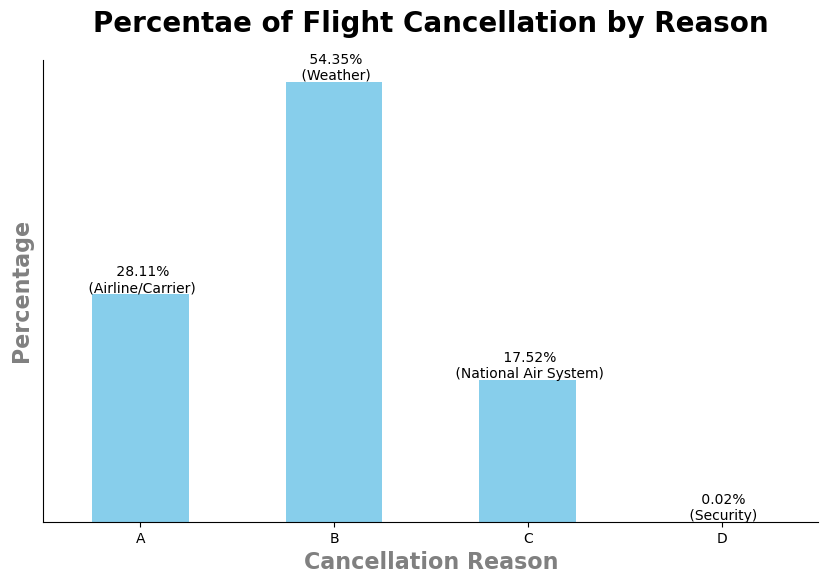

In [44]:
cancelled_flights = flights_copy[flights_copy['CANCELLED'] == 1]

related_reason_cancellation = ['A', 'B', 'C', 'D']
total_reason_cancelled = cancelled_flights['CANCELLATION_REASON'].isin(related_reason_cancellation).sum()

# calculate the percnetage of cancellations per each reason
percentage_cancellation_reason =(cancelled_flights['CANCELLATION_REASON'].value_counts(normalize = True).loc[related_reason_cancellation] * 100)

# Plotting the results

plt.figure(figsize = (10, 6))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
bars = percentage_cancellation_reason.plot(kind = 'bar', color = 'skyblue')

# Add the description of each reason
reason_descriptions = {
    'A': 'Airline/Carrier',
    'B': 'Weather',
    'C': 'National Air System',
    'D': 'Security'
}

for bar, reason, percent in zip (ax.patches, related_reason_cancellation, percentage_cancellation_reason):
    plt.annotate(f"{bar.get_height(): .2f}%\n ({reason_descriptions[reason]})",
                 xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha = 'center', va = 'center', fontsize = '10', color = 'black', textcoords = 'offset points', xytext = (0, 10))
   
plt.title('Percentae of Flight Cancellation by Reason',  pad = 20, 
          fontdict = {'fontsize': '20', 'fontweight': 'bold'})
plt.xlabel('Cancellation Reason', fontdict = {'fontsize': '16', 'fontweight': 'bold'}, color = 'grey')
plt.ylabel('Percentage', fontdict = {'fontsize': '16', 'fontweight': 'bold'}, color = 'grey')
plt.xticks(rotation = 0)
plt.yticks([])
plt.savefig('percentage_flight_cancellation_byreason.png', bbox = 'tight', transparent = True)
plt.show()

In [166]:
cancelled_flights = flights_copy[flights_copy['CANCELLED'] == 1]

related_reason_cancellation = ['A', 'B', 'C', 'D']
total_reason_cancelled = cancelled_flights['CANCELLATION_REASON'].isin(related_reason_cancellation).sum()

# calculate the percnetage of cancellations per each reason
percentage_cancellation_reason =(cancelled_flights['CANCELLATION_REASON'].value_counts(normalize = True).loc[related_reason_cancellation] * 100)
print(percentage_cancellation_reason)

CANCELLATION_REASON
A    28.105113
B    54.348939
C    17.521472
D     0.024476
Name: proportion, dtype: float64


# The Most and Less Reliable Airlines regarding on-time Departure

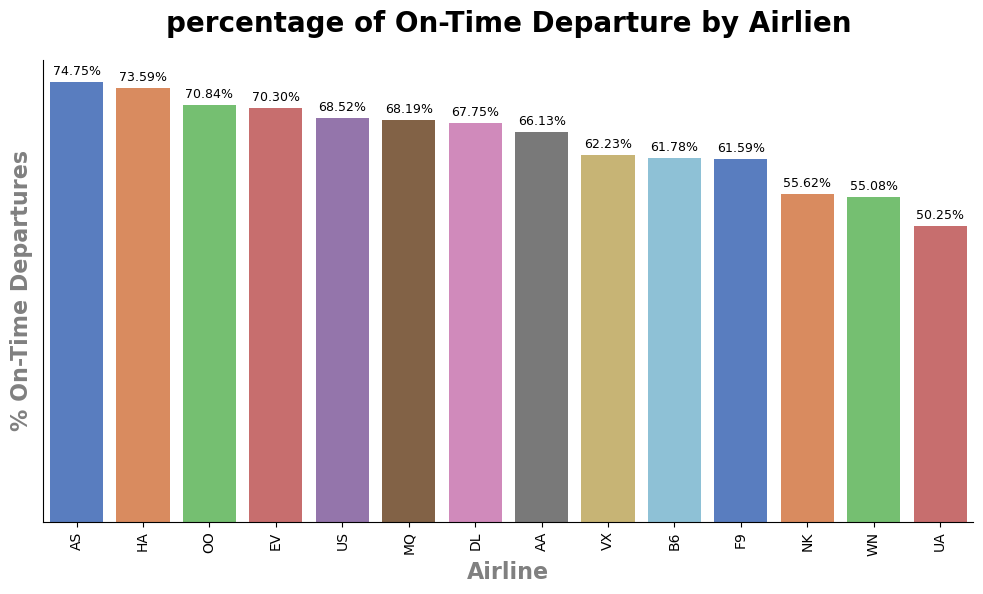

In [45]:
# Percentage of on-time departures for each airline

on_time_dep = flights_copy[flights_copy['DEPARTURE_DELAY'] <= 0]
on_time_depby_ariline = on_time_dep.groupby('AIRLINE')['FLIGHT_NUMBER'].count()
total_depby_airline = flights_copy.groupby('AIRLINE')['FLIGHT_NUMBER'].count()
percentage_ontime_dep = (on_time_depby_ariline / total_depby_airline) * 100

# Filtering airlines by the percentages of on-time departures

sorted_airlines = percentage_ontime_dep.sort_values(ascending = False)

# Plotting results
plt.figure(figsize = (12, 6))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
bars = sns.barplot(x = sorted_airlines.index, y = sorted_airlines.values,  palette = 'muted')
plt.title('percentage of On-Time Departure by Airlien', pad = 20, 
          fontdict = {'fontsize': '20', 'fontweight': 'bold'})
plt.xlabel('Airline',  fontdict = {'fontsize': '16', 'fontweight': 'bold'}, color = 'grey' )
plt.ylabel('% On-Time Departures',  fontdict = {'fontsize': '16', 'fontweight': 'bold'}, color = 'grey')
plt.xticks(rotation = 90)
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', xy = (bar.get_x() + bar.get_width() / 2, height),
               xytext = (0, 3), textcoords = 'offset points', ha = 'center', va = 'bottom', fontsize = 9)
    
plt.yticks([])
plt.savefig('percentage_ontime_dep_byairline.png', bbox = 'tight', transparent = True)
plt.show()

### Measuring the average departure delay for each airline

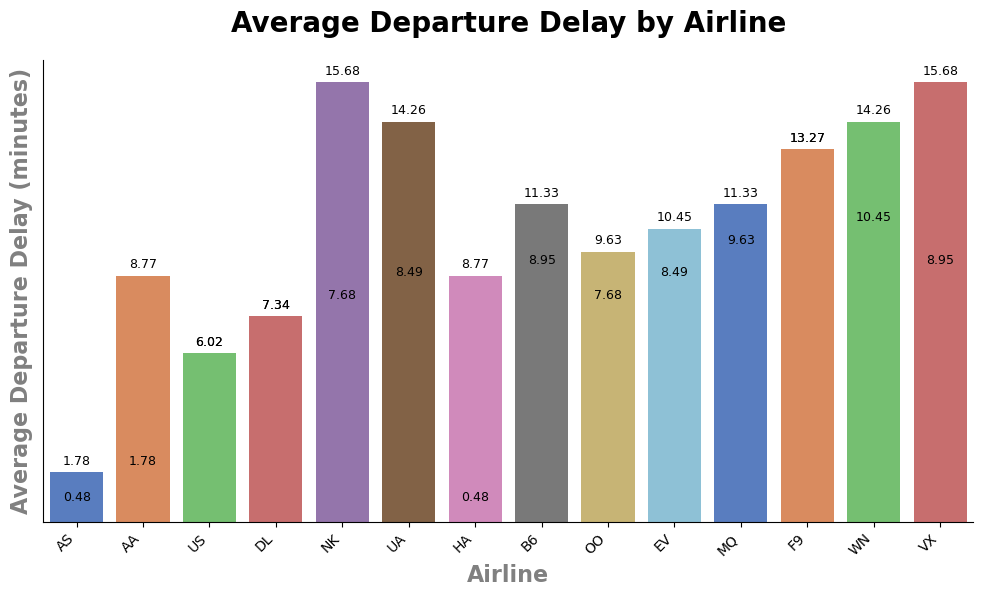

In [47]:
delay_dep_by_ariline =  flights_copy[flights_copy['DEPARTURE_DELAY']> 0]
avg_delay_by_airline = delay_dep_by_ariline.groupby('AIRLINE')['DEPARTURE_DELAY'].mean()
sorted_airlines = avg_delay.sort_values()

# Plotting the results
plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.barplot(x=sorted_airlines.index, y=sorted_airlines.values, palette='muted')
plt.title('Average Departure Delay by Airline', pad=20, 
          fontdict={'fontsize': '20', 'fontweight': 'bold'})

# Annotate with delay times

for p in sns.barplot(x = 'AIRLINE', y = 'DEPARTURE_DELAY', data = flights_copy, palette = 'muted', ci = None).patches:
    height = p.get_height()
    plt.annotate(f'{height:.2f}', xy = (p.get_x() + p.get_width() / 2, height),
                xytext = (0, 3), textcoords = 'offset points', ha = 'center', va = 'bottom', fontsize = 9)
    
plt.xlabel('Airline', fontdict={'fontsize': '16', 'fontweight': 'bold'}, color='grey')
plt.ylabel('Average Departure Delay (minutes)', fontdict={'fontsize': '16', 'fontweight': 'bold'}, color='grey')
plt.xticks(rotation=45, ha='right')
plt.yticks([])
plt.savefig('Average_departure_delay_by_airlinep.png', bbox = 'tight', transparent = True)
plt.show()